In [1]:
using Pkg
Pkg.activate("..")
using PIML4Power
using Flux
using Plots

  Activating environment at `~/PIML4Power.jl/Project.toml`
┌ Info: Precompiling PIML4Power [d21a5426-87c7-4d62-b7e9-54dded8ab86e]
└ @ Base loading.jl:1342


In [2]:
# import data
data, mat, id = load_data("../data/test_data_set.h5");
id_batch = collect(1:5:200)
opt = ADAM(0.001)

ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())

In [3]:
# initialize the grid parameters
#=
Nline = size(id.epsilon, 1)
gamma = log.(data.g) + 0.6*(1 .- 2*rand(Nline))
beta = log.(-data.b) + 0.6*(1 .- 2*rand(Nline))
gsh = data.gsh
bsh = data.bsh
=#

Nline = size(id.epsilon, 1)
gamma = 2 * ones(Nline)
beta = 3 * ones(Nline)
gsh = 1E-1 * ones(id.Nbus)
bsh = 1E-1 * ones(id.Nbus);


In [7]:
# train the model
Nepoch = 500
Ninter = 10
Niter = 7

PIML4Power.batch_pq_based_train!(data, mat, id, id_batch, opt, PIML4Power.exp_param,
    beta, gamma, bsh, gsh, Niter = Niter, Ninter = Ninter, Nepoch = Nepoch)

[10.0, 20.074973859400654, 8.626638032460018, 124.91895003116147]
[20.0, 19.310470231861434, 8.276164014206435, 124.24386869778004]
[30.0, 18.2680937158396, 8.179490069681044, 123.44584707302856]
[40.0, 16.907029490665057, 8.438196296288867, 122.61292457572317]
[50.0, 16.128372245749965, 8.015636020946598, 121.78270733122946]
[60.0, 15.122430900166217, 7.9686389602092085, 120.96951889944692]
[70.0, 14.074306387382206, 7.952474961944058, 120.30617472603551]
[80.0, 13.264694957422813, 7.843933195286399, 119.69449893805901]
[90.0, 12.075799930793506, 7.839538298483236, 118.95389122127362]
[100.0, 11.127203000518508, 7.729351764873694, 118.22201735459261]
[110.0, 10.417664479212172, 7.707597105880661, 117.60535471922142]
[120.0, 9.773091346665407, 7.663273947870083, 117.20766608817]
[130.0, 9.297791487611448, 7.567372006827683, 116.785758540299]
[140.0, 8.917613375052683, 7.462948511925929, 116.38221868704025]
[150.0, 8.643150094651322, 7.442380735434859, 116.05868101219]
[160.0, 8.3931635

In [8]:
b, g, bsh, gsh = PIML4Power.exp_param((beta, gamma, bsh, gsh));

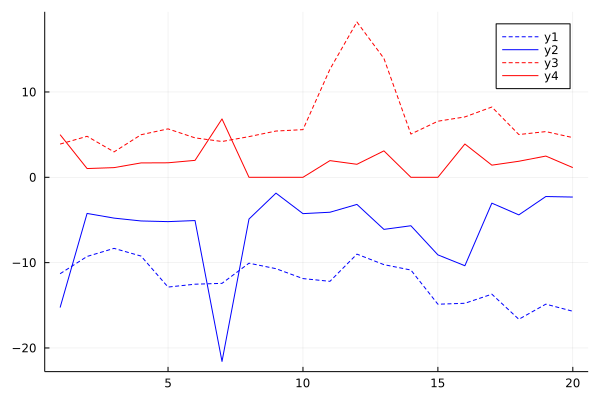

In [9]:
plot(b, color = :blue, style = :dash) 
plot!(data.b, color = :blue, style = :solid)

plot!(g, color = :red, style = :dash) 
plot!(data.g, color = :red, style = :solid)

In [ ]:
plot(gamma)

In [25]:
i = 5
th, v = newton_raphson_scheme(b, g, bsh, gsh, data.p[id.ns,i], data.q[id.pq,i],
    data.v[id.pv,i], data.th[id.slack,i], mat, id, Niter = Niter, const_jac = false)
p, q = v2s_map(b, g, bsh, gsh, v, th, mat, id)

([1.1392939550333252, 0.13687059036287572, -0.32969979216674083, -0.16729999999999848, -0.10000000000000091, -0.03919980050444939, -0.020820044783232662, -0.08526901419713921, -0.10989326869328268, -0.07570841414654964, -0.10000000000000073, -0.057646841325633046, -0.06790012392085373, -0.07675263725229241], [-0.005434735303817525, -0.09303922860197215, -0.10604954715149707, 0.023588283680358355, -0.010442860145640075, -0.0010740146991695943, -0.010803324099718518, -0.04485137931645867, -0.022308864265935185, -0.009016040978467463, 0.008078587729418697, 0.010803324099716294, -0.0020689081702946845, 0.011267867036006034])

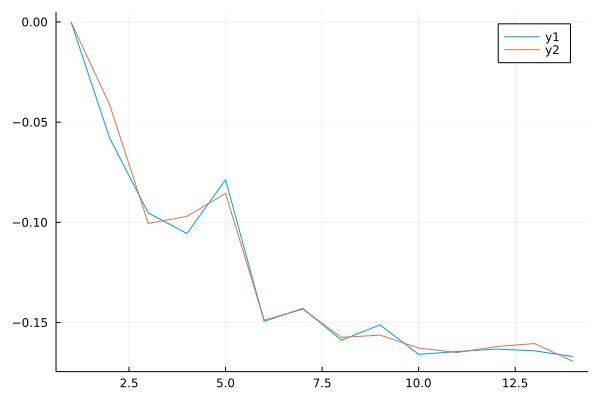

In [26]:
plot(th)
plot!(data.th[:,i])

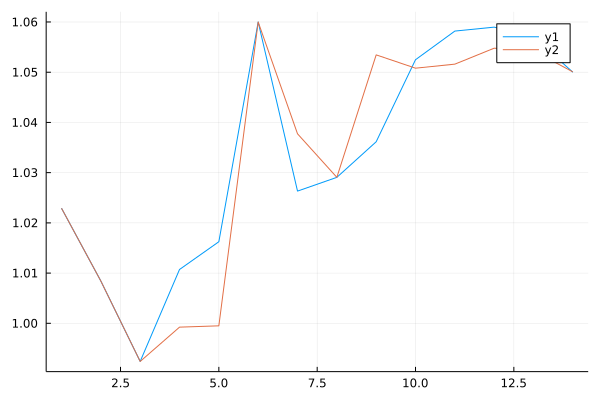

In [27]:
plot(v)
plot!(data.v[:,i])

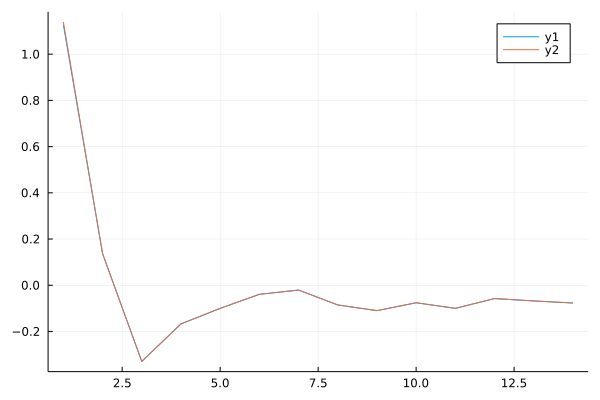

In [28]:
plot(data.p[:,i])
plot!(p)

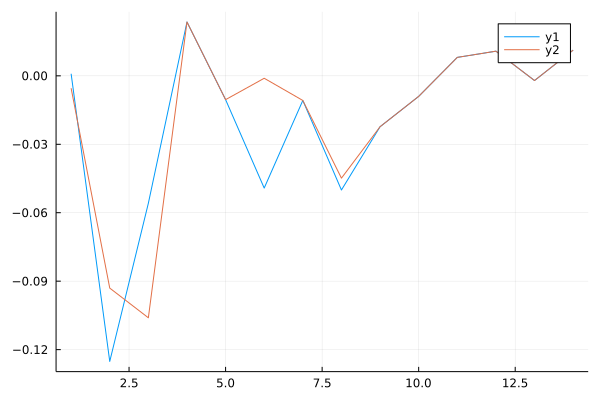

In [29]:
plot(data.q[:,i])
plot!(q)